### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pt
import math

### Load Dataset

In [2]:
titanic_data = pd.read_csv('Titanic-dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Clean Data

In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_data["Age"] = titanic_data["Age"].fillna(titanic_data["Age"].median())

In [8]:
titanic_data = titanic_data.drop("Cabin", axis=1)

In [10]:
titanic_data["Embarked"] = titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0])

### Q.1 Who survived more: males or females?

<Axes: xlabel='Survived', ylabel='count'>

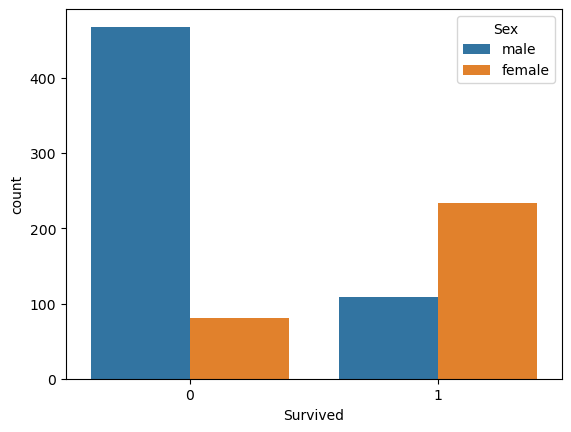

In [11]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

conclusion : females survived more

### Q.2 Did passenger class affect survival chances?

<Axes: xlabel='Survived', ylabel='count'>

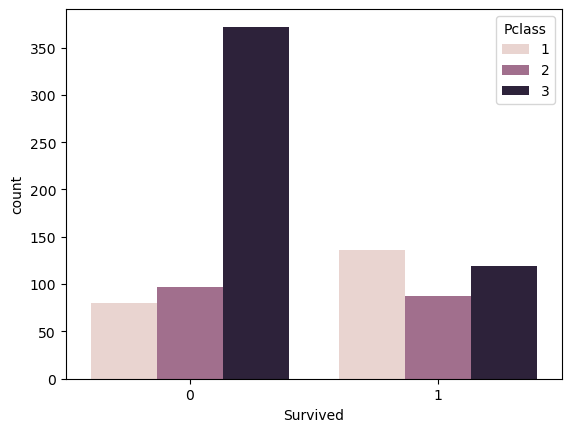

In [12]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

Yes, passenger class significantly affected survival chances.

Higher class (1st class) passengers had better survival chances

Lower class (3rd class) passengers had lower survival chances

### Q.3 What was the survival rate by age group?

In [18]:
titanic_data['AgeGroup'] = pd.cut(
    titanic_data['Age'],
    bins=[0,12,18,40,60,100],
    labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])

<Axes: xlabel='Survived', ylabel='count'>

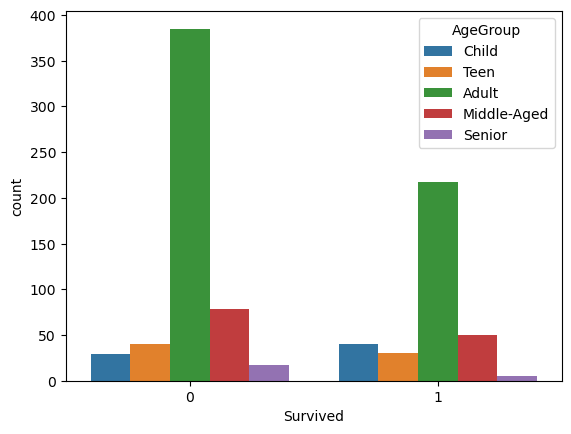

In [20]:
sns.countplot(x='Survived', hue='AgeGroup', data=titanic_data)

Survival chances varied significantly across age groups. Children had higher survival rates compared to adults and senior passengers, while older age groups had lower chances of survival.

### Q.4 Histogram of passenger ages

<Axes: ylabel='Frequency'>

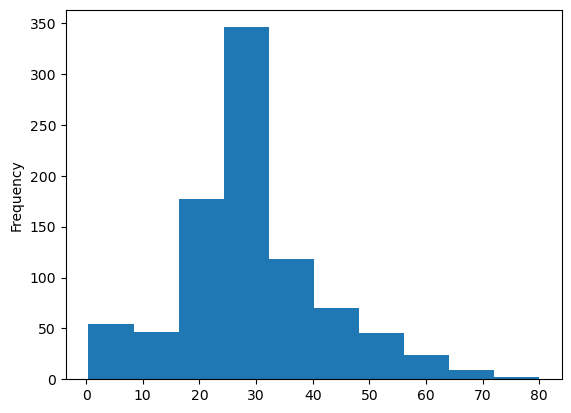

In [21]:
titanic_data['Age'].plot.hist()